In [19]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def get_pixel(img, center, x, y):
    """
    Get the pixel value of the image at coordinates x and y.
    """
    try:
        return img[x, y]
    except IndexError:
        # For pixels outside the image boundaries, return the intensity of the center pixel
        return center

def thresholded(center, pixels, bita=0.1):
    """
    Compare pixel values around the center pixel.
    """
    lower_bound = center * (1 - bita)
    upper_bound = center * (1 + bita)
    
    output = []
    for pixel in pixels:
        if lower_bound <= pixel <= upper_bound:
            output.append(1)
        else:
            output.append(0)
    return output

def compute_albp_pixel(img, x, y):
    """
    Compute the ALBP value of a single pixel.
    """
    center = img[x, y]
    pixels = [
        get_pixel(img, center, x+1, y-1),
        get_pixel(img, center, x, y-1),
        get_pixel(img, center, x-1, y-1),
        get_pixel(img, center, x-1, y),
        get_pixel(img, center, x-1, y+1),
        get_pixel(img, center, x, y+1),
        get_pixel(img, center, x+1, y+1),
        get_pixel(img, center, x+1, y)
    ]
    
    values = thresholded(center, pixels)
    res = sum(values[i] * (2**i) for i in range(len(values)))
    return res

def compute_albp_image(image):
    """
    Compute the ALBP image.
    """
    # Convert the image to grayscale if it's not already
    if len(image.shape) > 2:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Initialize the ALBP image with zeros
    albp_image = np.zeros_like(image)
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            albp_image[i, j] = compute_albp_pixel(image, i, j)
    return albp_image

def plot_and_save_albp(image_path, save_path):
    # Load an image
    image = cv2.imread(image_path)

    # Compute the ALBP image 
    albp_image = compute_albp_image(image)

    # Plot the original and ALBP images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(albp_image, cmap='gray')
    plt.title('ALBP Image')
    plt.axis('off')

    plt.savefig(save_path)  # Save the figure
    plt.show()

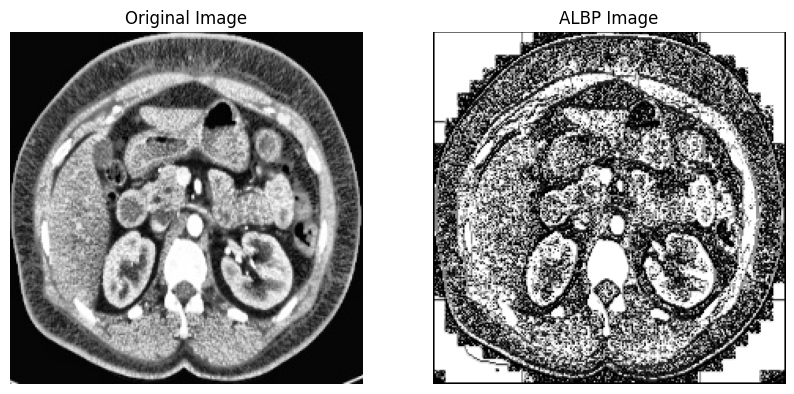

In [20]:
# Example usage:
image_path = 'Normal.jpg'
save_path = 'Normal_ALBP_1.jpg'
plot_and_save_albp(image_path, save_path)


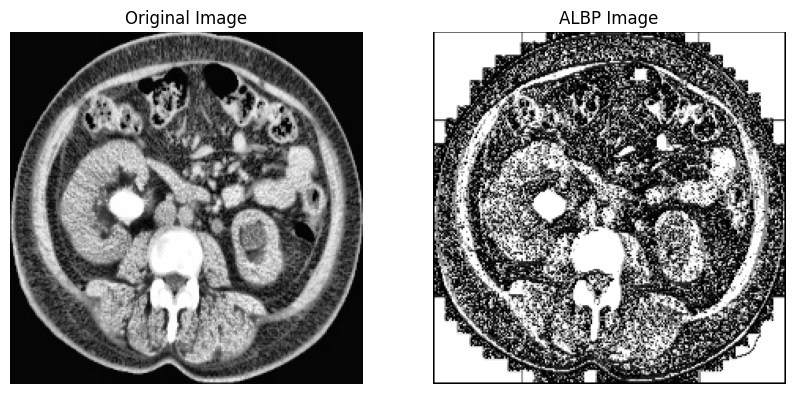

In [4]:
# Example usage:
image_path = 'Stone.jpg'
save_path = 'Stone_ALBP.jpg'
plot_and_save_albp(image_path, save_path)

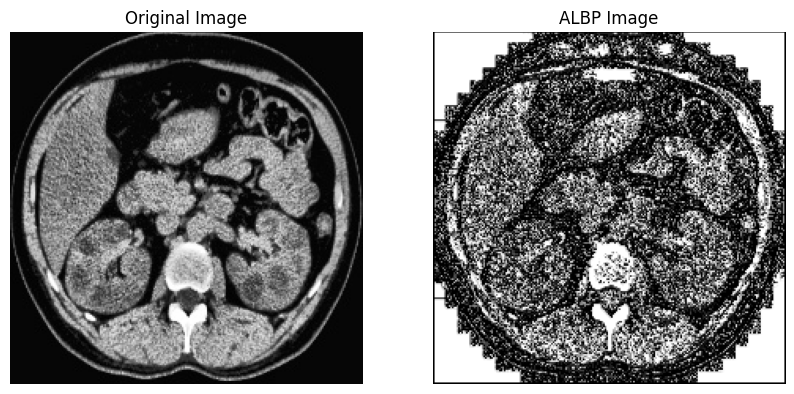

In [5]:
# Example usage:
image_path = 'Cyst.jpg'
save_path = 'Cyst_ALBP.jpg'
plot_and_save_albp(image_path, save_path)

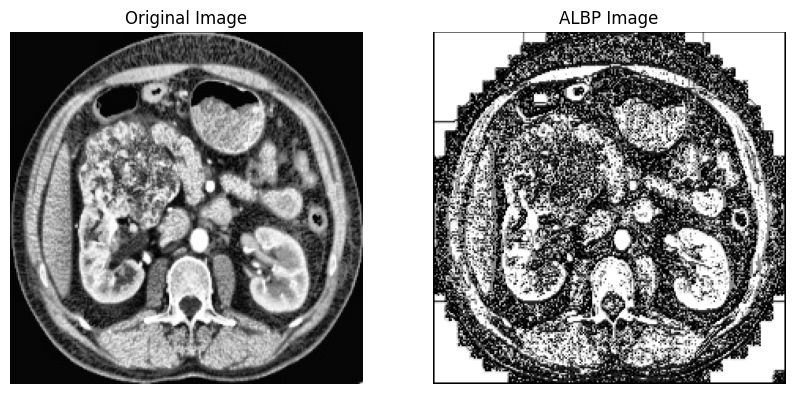

In [6]:
# Example usage:
image_path = 'Tumor.jpg'
save_path = 'Tumor_ALBP.jpg'
plot_and_save_albp(image_path, save_path)